In [19]:
import numpy as np
import pandas as pd

# Example: Assume we have a pandas DataFrame with data
num_samples = 100 # or number of storms in our case
time_steps = np.round(np.random.uniform(5, 15, 100),0) # or number of hours in our case
num_features = 5 # or number of variables in our case

# Generating a sample DataFrame for illustration
data = [np.random.rand(num_samples * step, num_features) for step in time_steps]
df = pd.DataFrame(data, columns=[f'feature_{i+1}' for i in range(num_features)])

# Assuming the DataFrame is organized with time_steps per sample
# This reshaping assumes the data is organized such that⁄ each 'block' of time_steps belongs to one sample
data_3d = df.values.reshape(num_samples, time_steps, num_features)

# Now data_3d is ready for use with an LSTM
print(data_3d.shape)  # Should print (100, 10, 5)

TypeError: 'numpy.float64' object cannot be interpreted as an integer

In [2]:
import pandas as pd
path = '/Users/fabienaugsburger/Documents/GitHub/master-project/DATASETS/'
def split_variable_level(variable_with_level):
    parts = variable_with_level.rsplit('_', 1)
    if len(parts) == 2 and parts[1].isdigit():
        return parts[0], parts[1]
    else:
        return variable_with_level, 0

# Read the list of variables
name_of_variables = pd.read_csv('/Users/fabienaugsburger/Documents/GitHub/master-project/variable_list_24_v5.csv')
#name_of_variables = name_of_variables['variable'].tolist()

# Define the dataset to use
dataset = 'datasets_1h'
missing = []

# Create a new list of variables
#new_name_of_variables = []
for idx, row in name_of_variables.iterrows():
    variable = split_variable_level(row['variables'])[0]
    level = split_variable_level(row['variables'])[1]
    print(variable, level)

    locals()[f'max_{variable}_{level}'] = pd.DataFrame()
    locals()[f'min_{variable}_{level}'] = pd.DataFrame()
    locals()[f'mean_{variable}_{level}'] = pd.DataFrame()
    locals()[f'sigma_{variable}_{level}'] = pd.DataFrame()

    for j in range(1, 96 + 1):
    #if level == 'pl':
        #for lvl in level:
            try:
                    df_max_temp = pd.read_csv(f'{path}{dataset}/{variable}/storm_{j}/max_{j}_{level}.csv')
                    df_min_temp = pd.read_csv(f'{path}{dataset}/{variable}/storm_{j}/min_{j}_{level}.csv')
                    df_mean_temp = pd.read_csv(f'{path}{dataset}/{variable}/storm_{j}/mean_{j}_{level}.csv')
                    df_sigma_temp = pd.read_csv(f'{path}{dataset}/{variable}/storm_{j}/std_{j}_{level}.csv')
                    #print(f'File for storm {j} and variable {variable} found.')
            except FileNotFoundError:
                ds_missing = missing.append(f'{variable}_{level}')
                #print(f"File for storm {j}, variable {variable}, and level {level} not found.")
                continue
                    # Check if the columns exist before dropping/renaming
            if 'Unnamed: 0' in df_max_temp.columns:
                df_max_temp = df_max_temp.drop(columns=['Unnamed: 0'])
            if 'Unnamed: 0' in df_min_temp.columns:
                df_min_temp = df_min_temp.drop(columns=['Unnamed: 0'])
            if 'Unnamed: 0' in df_mean_temp.columns:
                df_mean_temp = df_mean_temp.drop(columns=['Unnamed: 0'])
            if 'Unnamed: 0' in df_sigma_temp.columns:
                df_sigma_temp = df_sigma_temp.drop(columns=['Unnamed: 0'])

            if '0' in df_max_temp.columns:
                df_max_temp = df_max_temp.rename(columns={'0': f'storm_{j}'})
            if '0' in df_min_temp.columns:
                df_min_temp = df_min_temp.rename(columns={'0': f'storm_{j}'})
            if '0' in df_mean_temp.columns:
                df_mean_temp = df_mean_temp.rename(columns={'0': f'storm_{j}'})
            if '0' in df_sigma_temp.columns:
                df_sigma_temp = df_sigma_temp.rename(columns={'0': f'storm_{j}'})

            locals()[f'max_{variable}_{level}'] = pd.concat([locals()[f'max_{variable}_{level}'], df_max_temp], axis=1)
            locals()[f'min_{variable}_{level}'] = pd.concat([locals()[f'min_{variable}_{level}'], df_min_temp], axis=1)
            locals()[f'mean_{variable}_{level}'] = pd.concat([locals()[f'mean_{variable}_{level}'], df_mean_temp], axis=1)
            locals()[f'sigma_{variable}_{level}'] = pd.concat([locals()[f'sigma_{variable}_{level}'], df_sigma_temp], axis=1)

'''        else:
            try:
                    df_max_temp = pd.read_csv(f'{path}{dataset}/{variable}/storm_{j}/max_{j}_0.csv')
                    df_min_temp = pd.read_csv(f'{path}{dataset}/{variable}/storm_{j}/min_{j}_0.csv')
                    df_mean_temp = pd.read_csv(f'{path}{dataset}/{variable}/storm_{j}/mean_{j}_0.csv')
                    df_sigma_temp = pd.read_csv(f'{path}{dataset}/{variable}/storm_{j}/std_{j}_0.csv')
                    #print(f'File for storm {j} and variable {variable} found.')
            except FileNotFoundError:
                ds_missing = missing.append(f'{variable}_{level}')
                #print(f"File for storm {j}, variable {variable}, and level {level} not found.")
                continue
            # Check if the columns exist before dropping/renaming
            if 'Unnamed: 0' in df_max_temp.columns:
                df_max_temp = df_max_temp.drop(columns=['Unnamed: 0'])
            if 'Unnamed: 0' in df_min_temp.columns:
                df_min_temp = df_min_temp.drop(columns=['Unnamed: 0'])
            if 'Unnamed: 0' in df_mean_temp.columns:
                df_mean_temp = df_mean_temp.drop(columns=['Unnamed: 0'])
            if 'Unnamed: 0' in df_sigma_temp.columns:
                df_sigma_temp = df_sigma_temp.drop(columns=['Unnamed: 0'])

            if '0' in df_max_temp.columns:
                df_max_temp = df_max_temp.rename(columns={'0': f'storm_{j}_level_0'})
            if '0' in df_min_temp.columns:
                df_min_temp = df_min_temp.rename(columns={'0': f'storm_{j}_level_0'})
            if '0' in df_mean_temp.columns:
                df_mean_temp = df_mean_temp.rename(columns={'0': f'storm_{j}_level_0'})
            if '0' in df_sigma_temp.columns:
                df_sigma_temp = df_sigma_temp.rename(columns={'0': f'storm_{j}_level_0'})

            locals()[f'max_{variable}'] = pd.concat([locals()[f'max_{variable}'], df_max_temp], axis=1)
            locals()[f'min_{variable}'] = pd.concat([locals()[f'min_{variable}'], df_min_temp], axis=1)
            locals()[f'mean_{variable}'] = pd.concat([locals()[f'mean_{variable}'], df_mean_temp], axis=1)
            locals()[f'sigma_{variable}'] = pd.concat([locals()[f'sigma_{variable}'], df_sigma_temp], axis=1)'''

10m_u_component_of_wind 0
10m_v_component_of_wind 0
2m_dewpoint_temperature 0
2m_temperature 0
convective_available_potential_energy 0
convective_precipitation 0
convective_rain_rate 0
convective_snowfall 0
geopotential 500
geopotential 1000
high_cloud_cover 0
instantaneous_10m_wind_gust 0
k_index 0
land_sea_mask 0
large_scale_precipitation 0
large_scale_snowfall 0
mean_large_scale_precipitation_rate 0
mean_top_net_long_wave_radiation_flux 0
mean_top_net_short_wave_radiation_flux 0
mean_total_precipitation_rate 0
mean_sea_level_pressure 0
mean_surface_latent_heat_flux 0
mean_surface_net_long_wave_radiation_flux 0
mean_surface_net_short_wave_radiation_flux 0
mean_vertically_integrated_moisture_divergence 0
relative_humidity 10
relative_humidity 20
relative_humidity 30
relative_humidity 50
relative_humidity 70
relative_humidity 100
relative_humidity 150
relative_humidity 200
relative_humidity 250
relative_humidity 300
relative_humidity 400
relative_humidity 500
relative_humidity 600
rela

'        else:\n            try:\n                    df_max_temp = pd.read_csv(f\'{path}{dataset}/{variable}/storm_{j}/max_{j}_0.csv\')\n                    df_min_temp = pd.read_csv(f\'{path}{dataset}/{variable}/storm_{j}/min_{j}_0.csv\')\n                    df_mean_temp = pd.read_csv(f\'{path}{dataset}/{variable}/storm_{j}/mean_{j}_0.csv\')\n                    df_sigma_temp = pd.read_csv(f\'{path}{dataset}/{variable}/storm_{j}/std_{j}_0.csv\')\n                    #print(f\'File for storm {j} and variable {variable} found.\')\n            except FileNotFoundError:\n                ds_missing = missing.append(f\'{variable}_{level}\')\n                #print(f"File for storm {j}, variable {variable}, and level {level} not found.")\n                continue\n            # Check if the columns exist before dropping/renaming\n            if \'Unnamed: 0\' in df_max_temp.columns:\n                df_max_temp = df_max_temp.drop(columns=[\'Unnamed: 0\'])\n            if \'Unnamed: 0\' in 

In [3]:
import numpy as np
import pandas as pd

# List of variable names based on the image

# Initialize the list to hold the data for each storm
data_list = []

for storm_idx in range(96):
    storm_data = []
    for var_name in name_of_variables.iterrows():
        var_name = split_variable_level(row['variables'])[0]
        level = split_variable_level(row['variables'])[1]
        try:
            df = locals()[f'mean_{var_name}_{level}']
            if df.shape[1] > storm_idx:  # Check if the storm index exists in the DataFrame
                storm_series = df.iloc[:, storm_idx].values
                storm_data.append(storm_series)
            else:
                storm_data.append(np.array([]))  # Append an empty array if the storm index does not exist
        except KeyError:
            storm_data.append(np.array([]))  # Append an empty array if the variable is not found

    # Find the maximum length of time steps for the current storm
    max_time_steps = max(len(series) for series in storm_data)

    # Pad the data to have the same length of time steps
    storm_data_padded = [np.pad(series, (0, max_time_steps - len(series)), 'constant', constant_values=np.nan) for series in storm_data]

    # Stack the variables together and add to the list
    data_list.append(np.stack(storm_data_padded, axis=1))

# Convert the list to a 3D numpy array
X_all_3d = np.stack(data_list, axis=0)

print("Shape of the 3D ndarray:", X_all_3d.shape)

Shape of the 3D ndarray: (96, 472, 71)


In [32]:
# Example variable name to separate
variable_to_separate = "instantaneous_10m_wind_gust"
list_var = name_of_variables['variables'].tolist()

# Find the index of the variable in the variable_names list
variable_index = list_var.index(variable_to_separate)

# Extract the variable into a separate 2D array
separated_variable = X_all_3d[:, :, variable_index]

# Remove the variable from the original 3D ndarray
data_3d_reduced = np.delete(X_all_3d, variable_index, axis=2)

# Print the shapes of the separated variable and the reduced ndarray
print("Shape of the separated variable:", separated_variable.shape)
print("Shape of the reduced 3D ndarray:", data_3d_reduced.shape)

Shape of the separated variable: (96, 472)
Shape of the reduced 3D ndarray: (96, 472, 70)


In [12]:
storm_n = 26
print(X_all_3d[storm_n].shape, np.isnan(X_all_3d[storm_n]).sum())

storm_index_test_valid = [0, 3, 4, 11, 13, 14, 17, 20, 25, 27, 28, 29, 31, 35, 53, 54, 57, 64, 69, 71, 75, 81, 85, 86, 87, 90, 92, 93, 95]
storm_index_validation = [3, 4, 11, 17, 31, 35, 54, 86, 87, 92]
storm_index_all = range(96)

# remove index of storm in the test set from the validation set

storm_index_test = [x for x in storm_index_test_valid if x not in storm_index_validation]

# remove index of storm in the valdation set from the test set

storm_index_validation = [x for x in storm_index_validation if x not in storm_index_test]

# remove index of storm in the training set from the validation set and validation set

storm_index_training = [x for x in storm_index_all if x not in storm_index_test_valid]

print(storm_index_validation, storm_index_test)
print(storm_index_training)

(472, 71) 0
[3, 4, 11, 17, 31, 35, 54, 86, 87, 92] [0, 13, 14, 20, 25, 27, 28, 29, 53, 57, 64, 69, 71, 75, 81, 85, 90, 93, 95]
[1, 2, 5, 6, 7, 8, 9, 10, 12, 15, 16, 18, 19, 21, 22, 23, 24, 26, 30, 32, 33, 34, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 55, 56, 58, 59, 60, 61, 62, 63, 65, 66, 67, 68, 70, 72, 73, 74, 76, 77, 78, 79, 80, 82, 83, 84, 88, 89, 91, 94]


In [14]:
# extract the data for the test set and the validation set

X_test = X_all_3d[storm_index_test,:,:]
X_validation = X_all_3d[storm_index_validation,:,:]
X_train = X_all_3d[storm_index_training,:,:]

# separate the variable to predict
variable_to_separate = "instantaneous_10m_wind_gust"
list_var = name_of_variables['variables'].tolist()

# Find the index of the variable in the variable_names list
variable_index = list_var.index(variable_to_separate)

y_test = X_test[:,:,variable_index]
y_validation = X_validation[:,:,variable_index]
y_train = X_train[:,:,variable_index]

# remove the variable to predict from the data

X_test = np.delete(X_test, variable_index, axis=2)
X_validation = np.delete(X_validation, variable_index, axis=2)
X_train = np.delete(X_train, variable_index, axis=2)

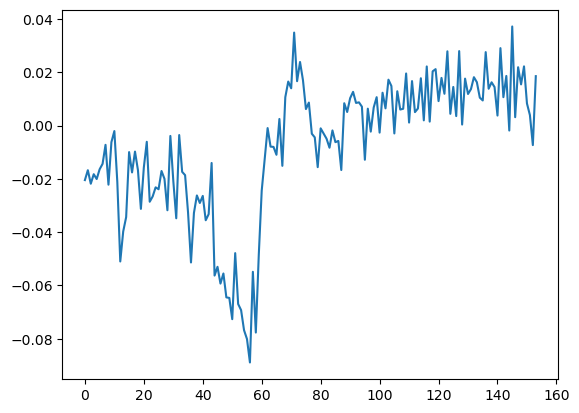

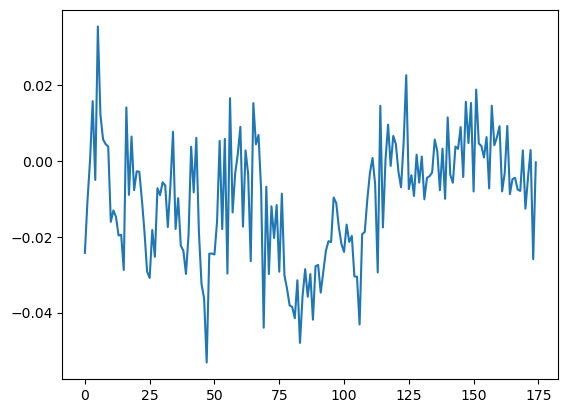

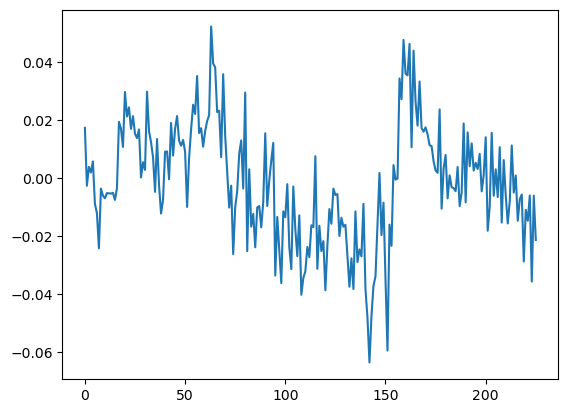

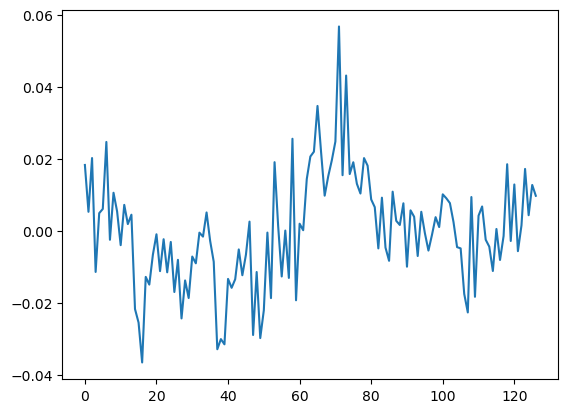

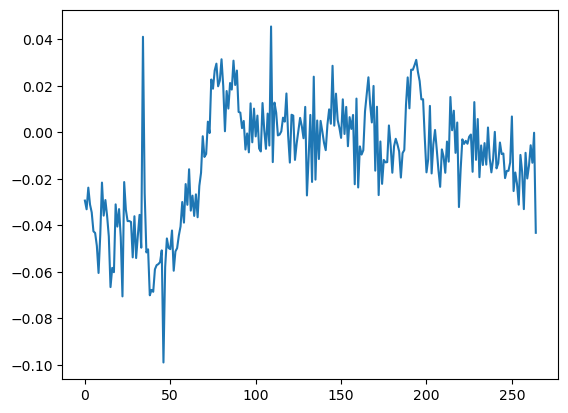

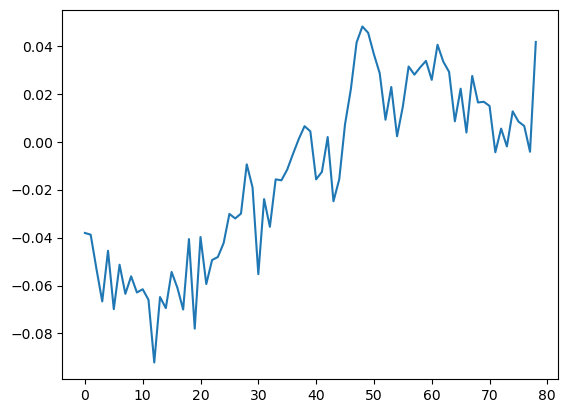

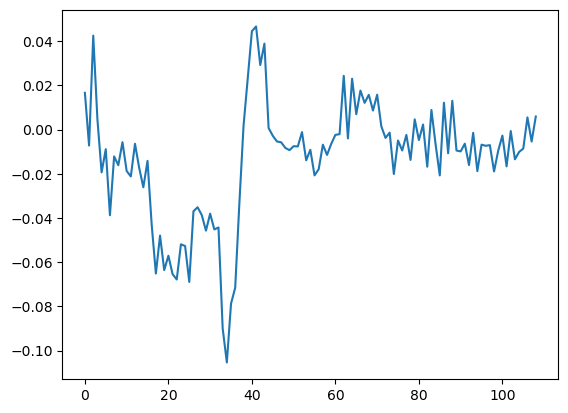

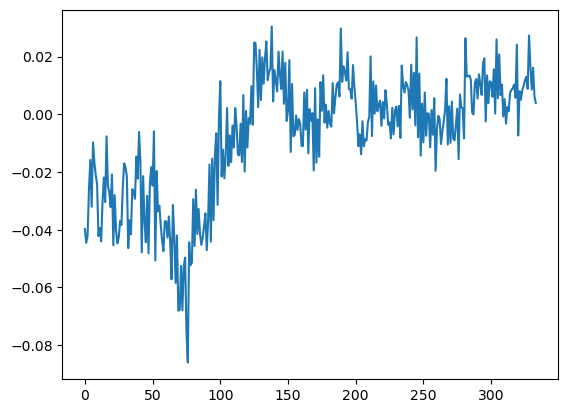

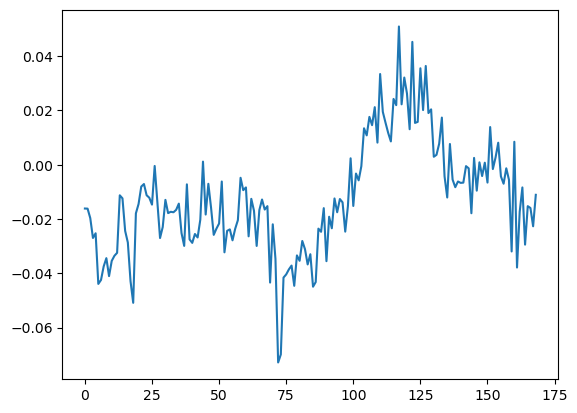

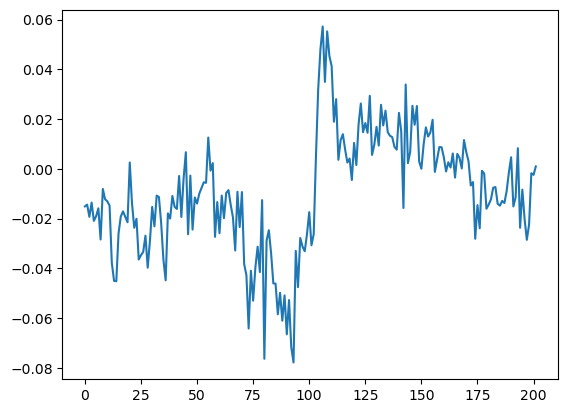

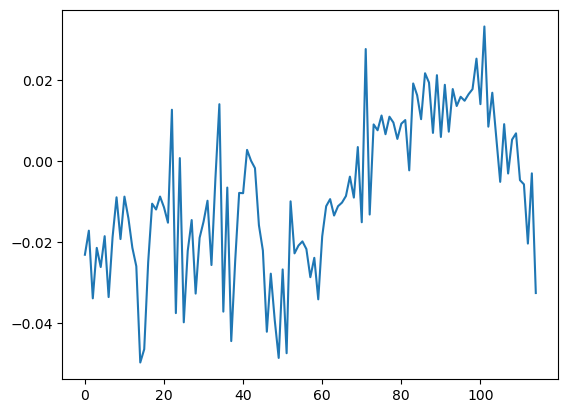

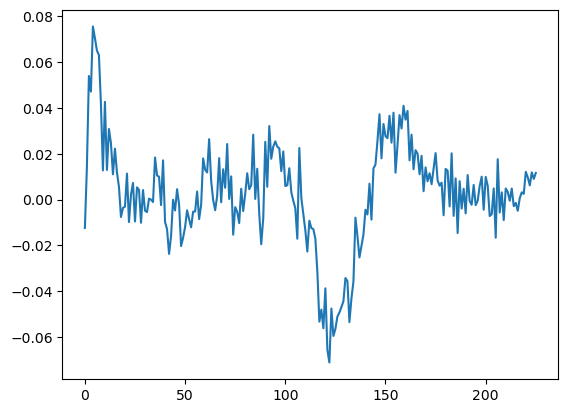

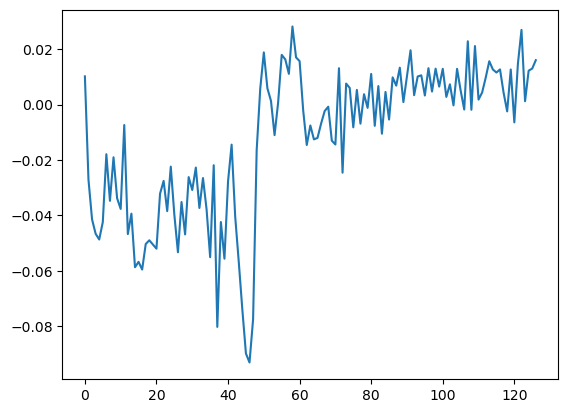

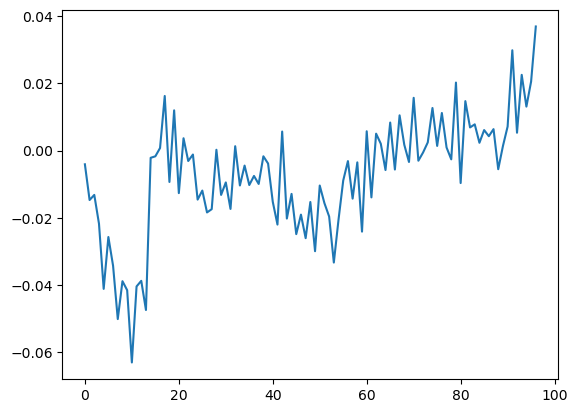

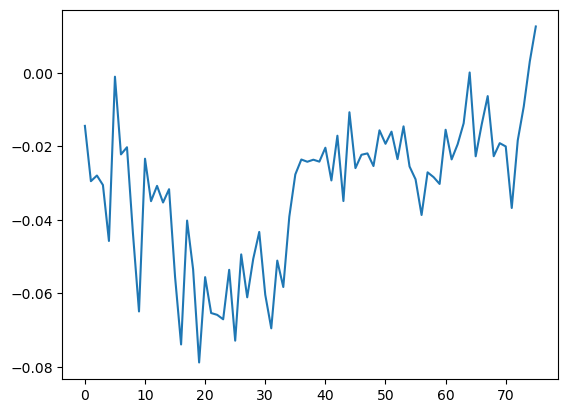

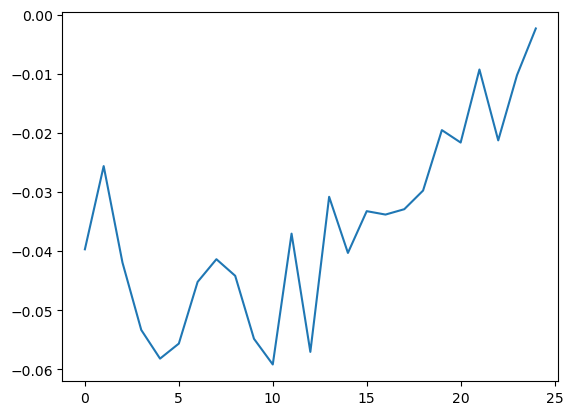

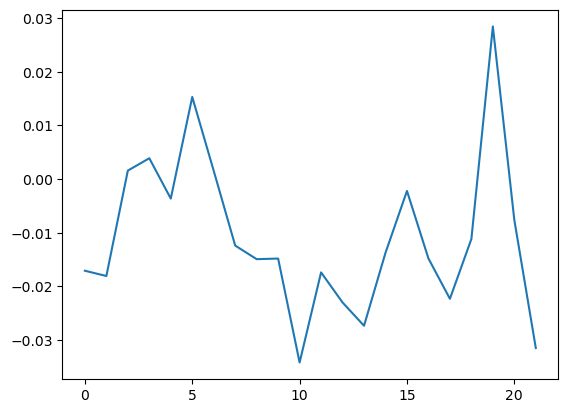

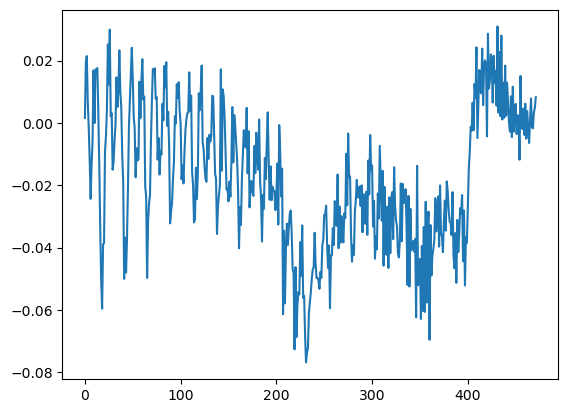

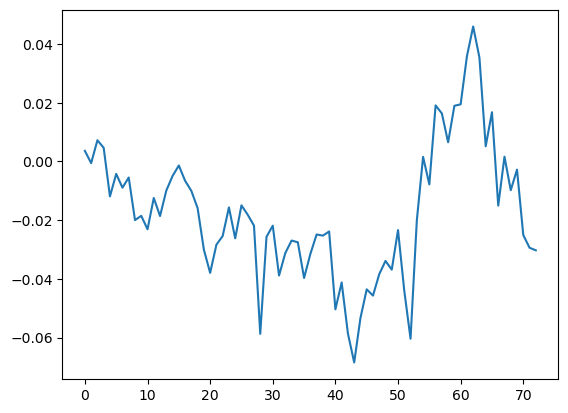

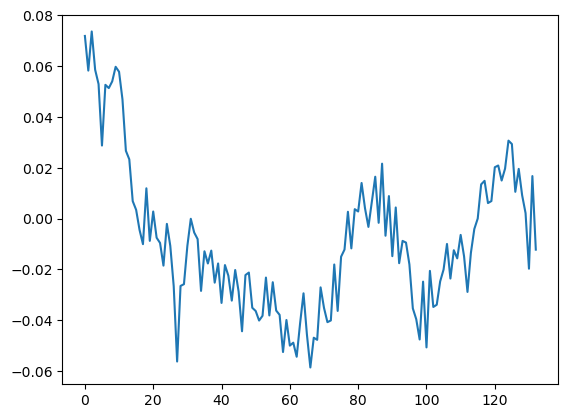

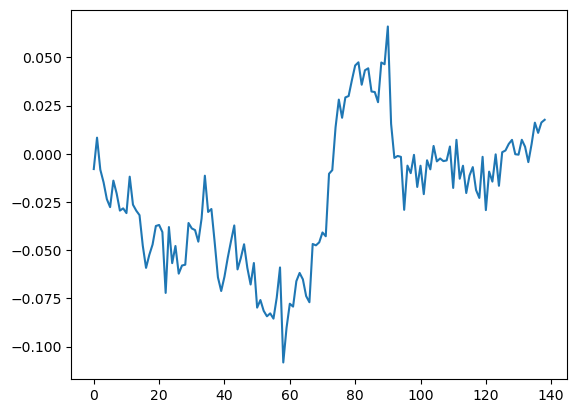

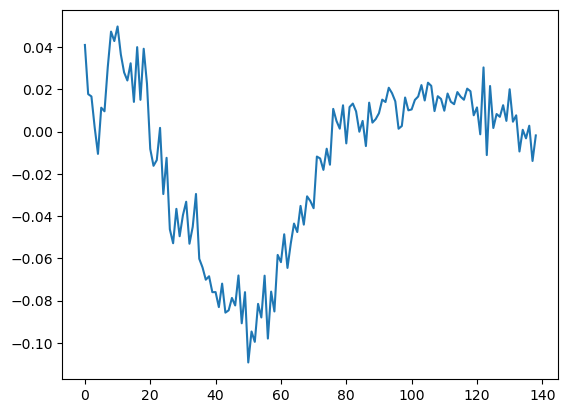

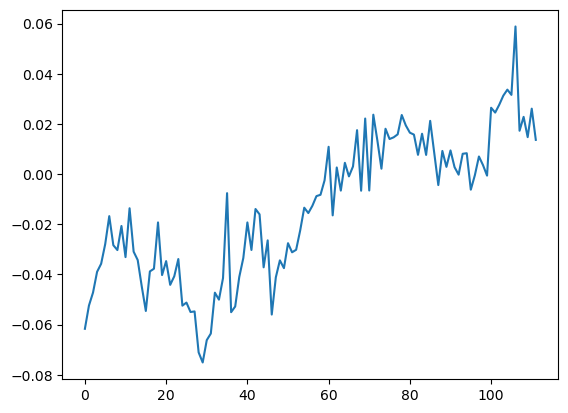

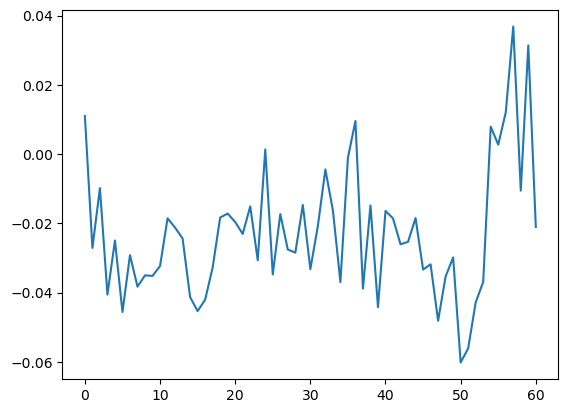

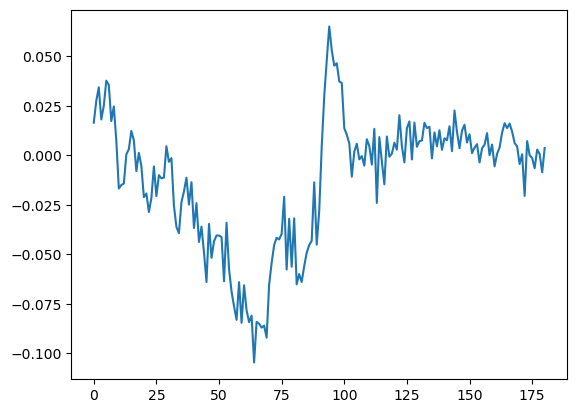

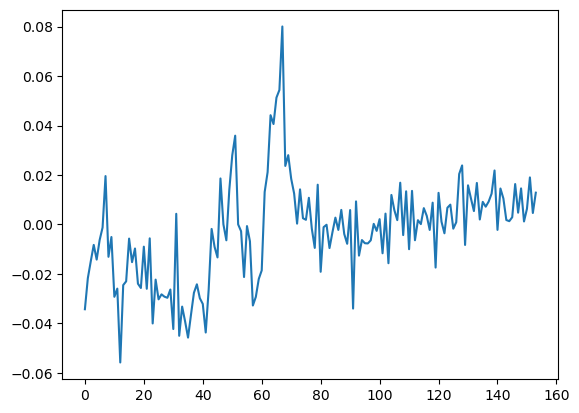

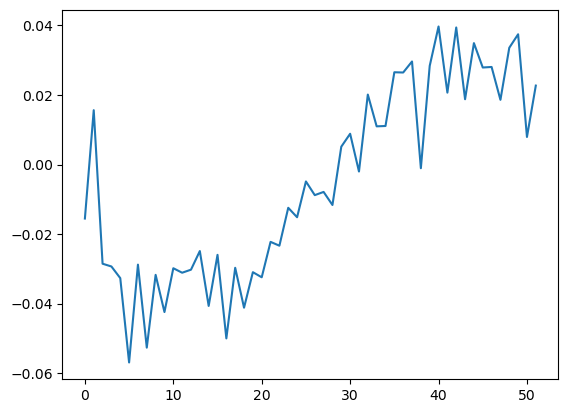

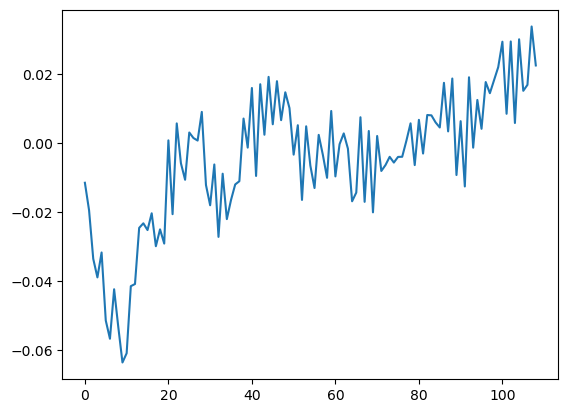

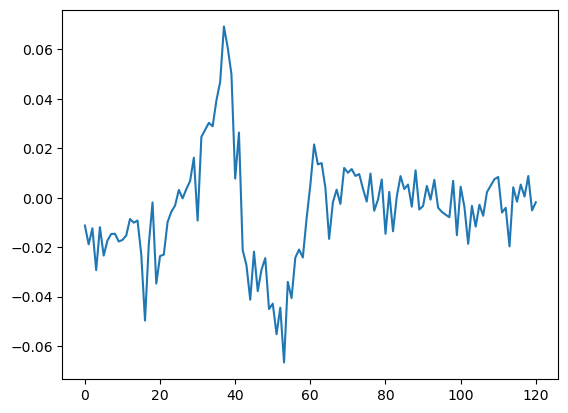

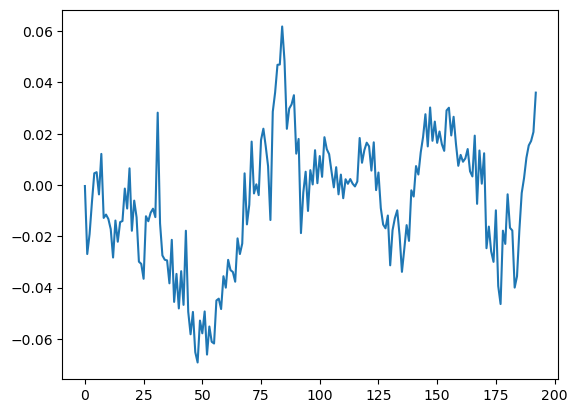

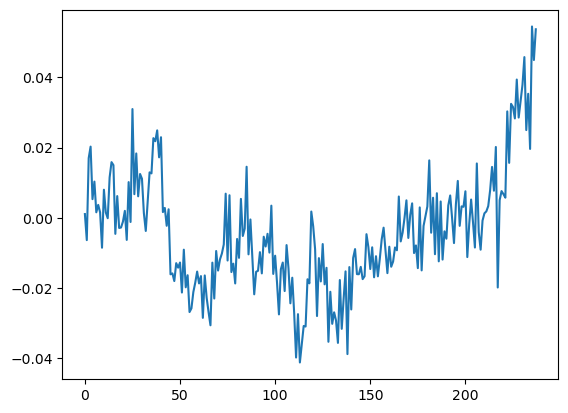

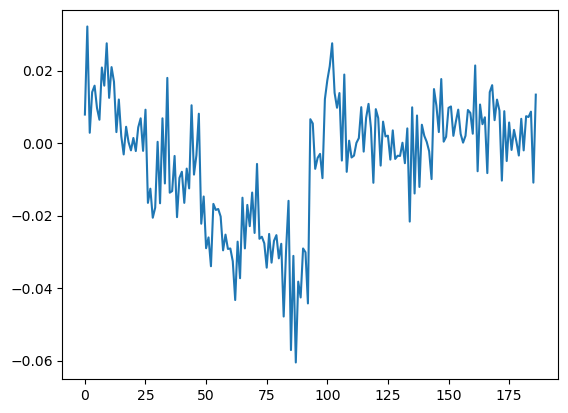

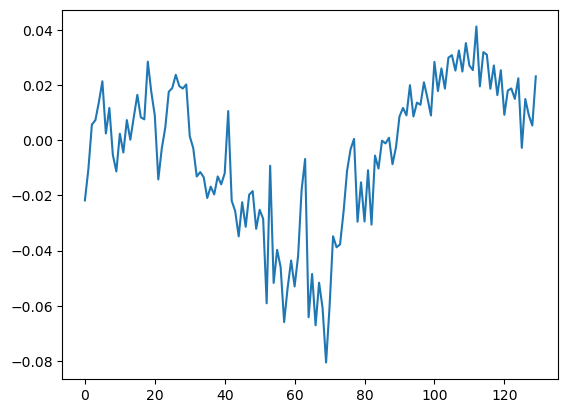

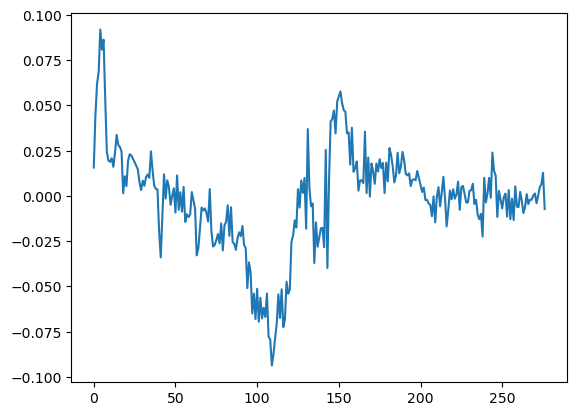

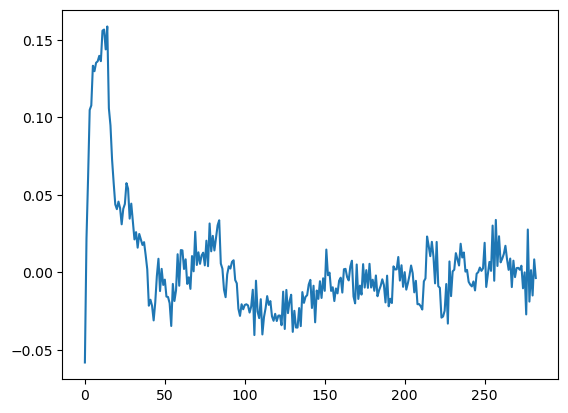

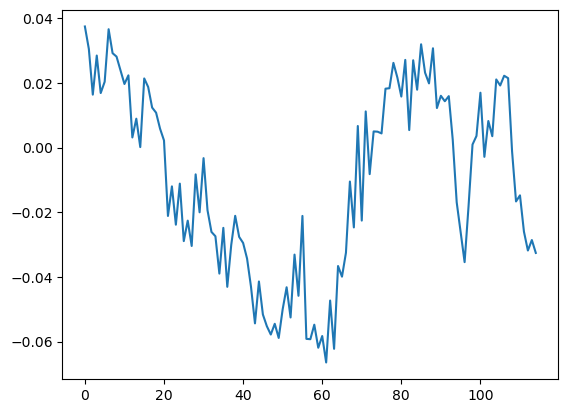

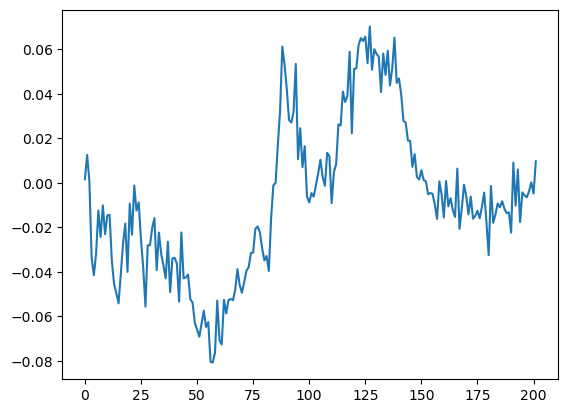

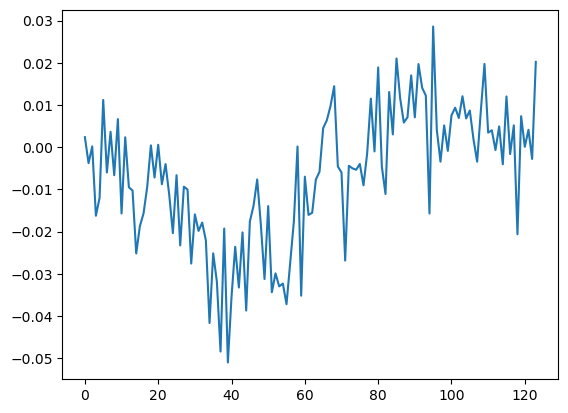

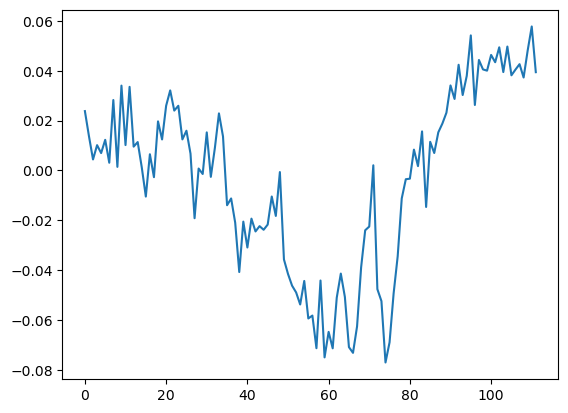

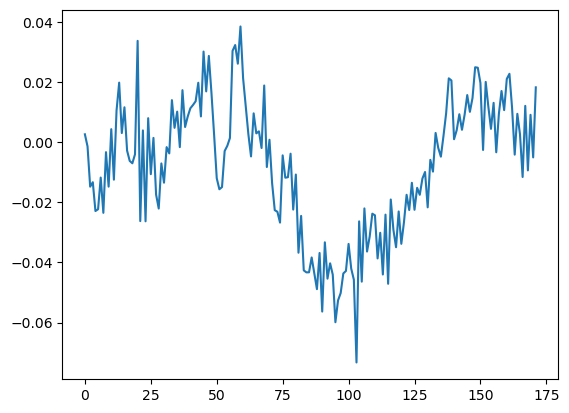

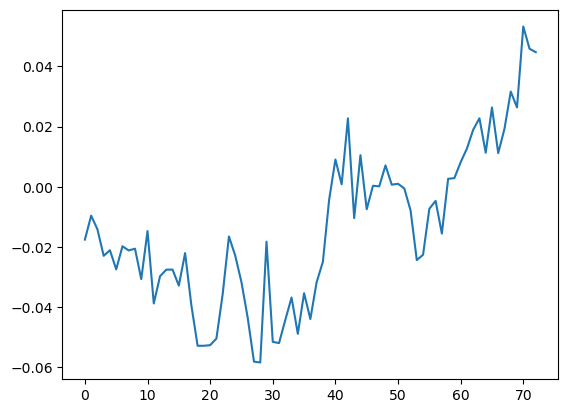

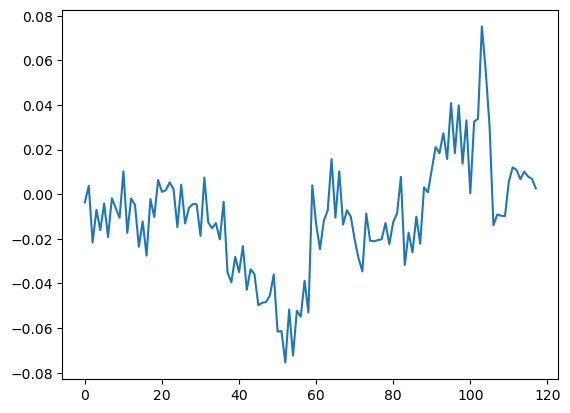

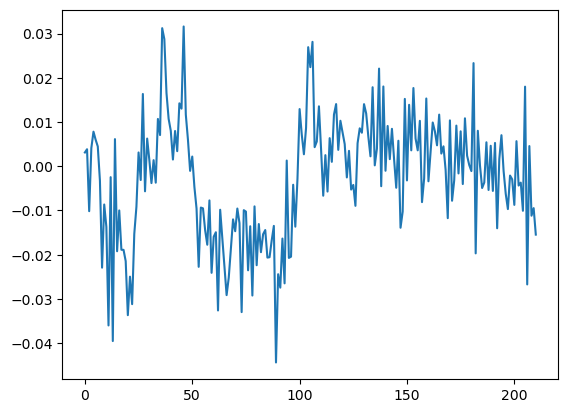

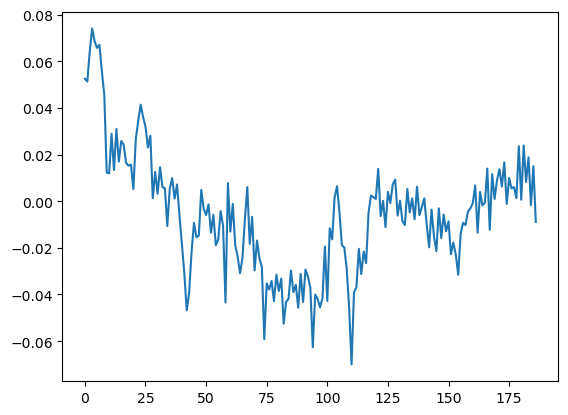

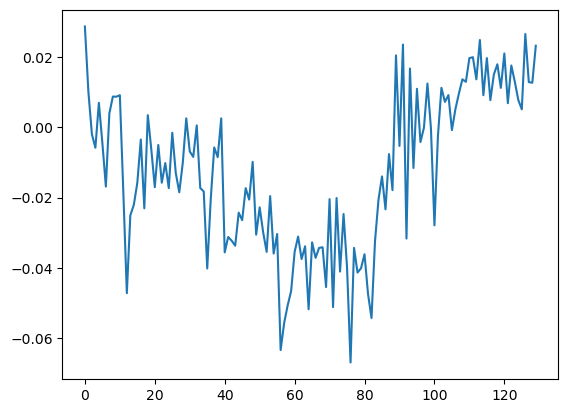

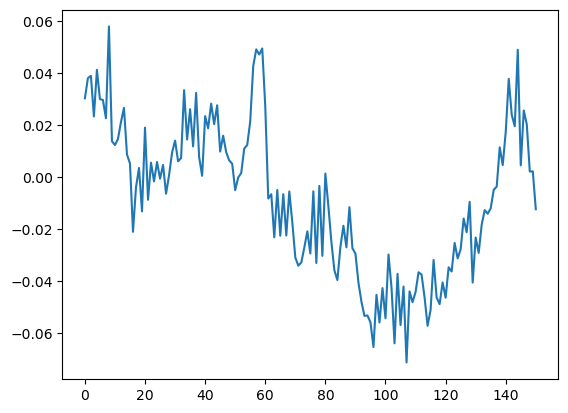

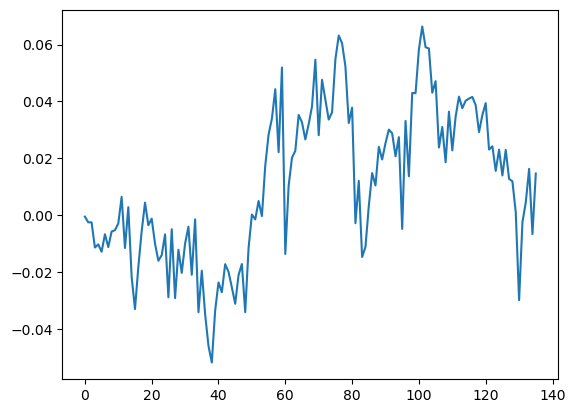

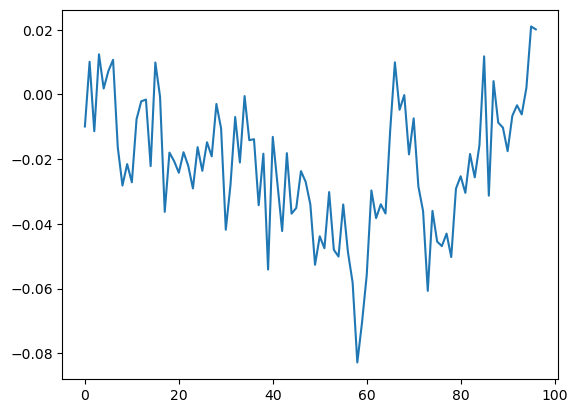

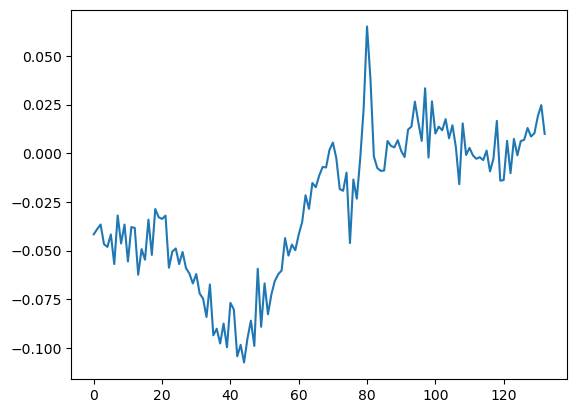

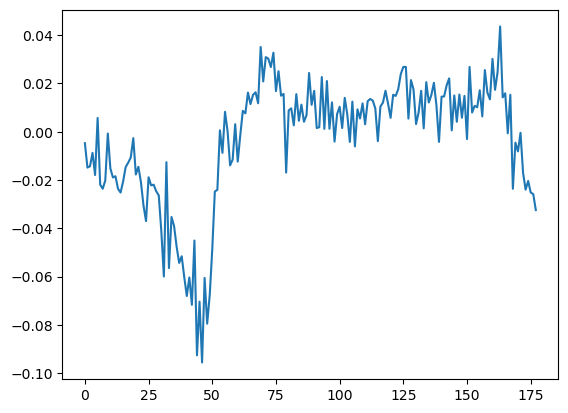

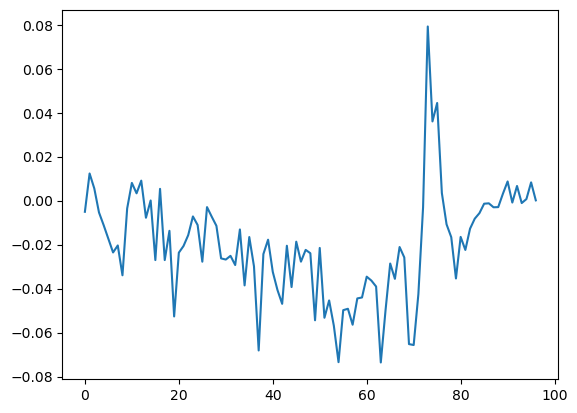

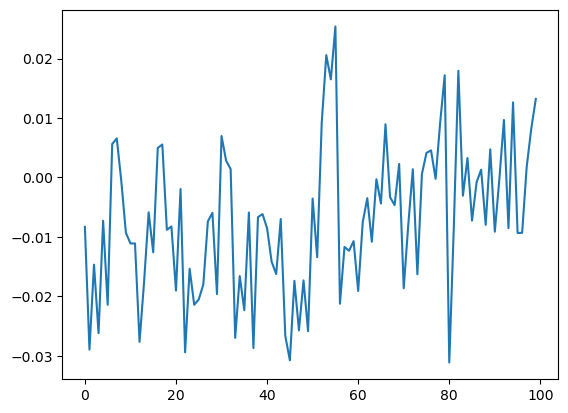

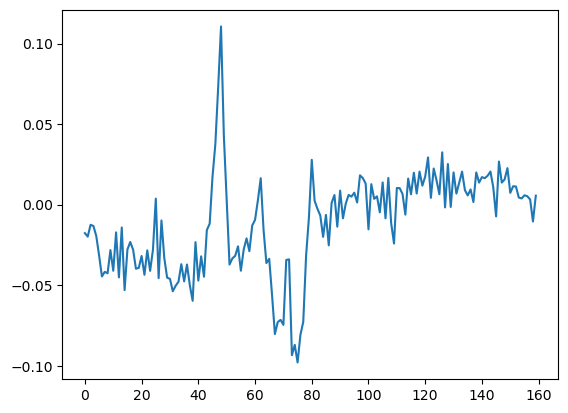

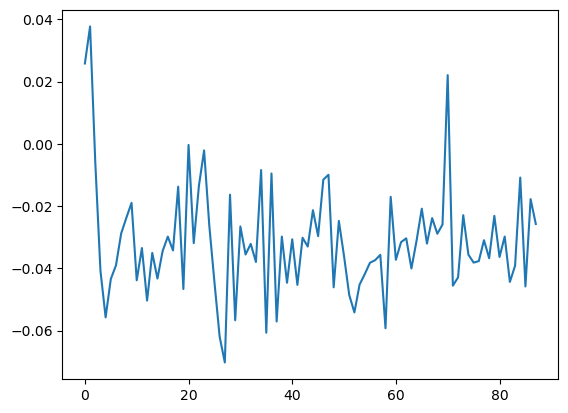

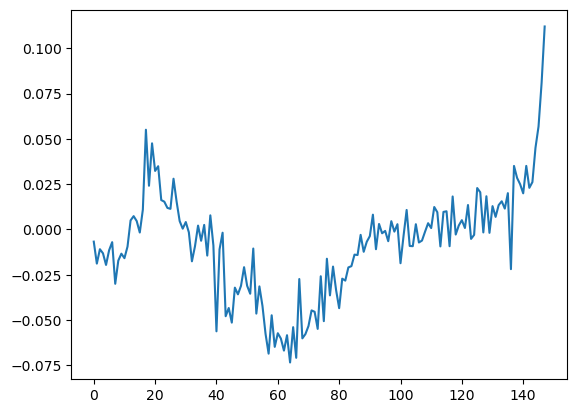

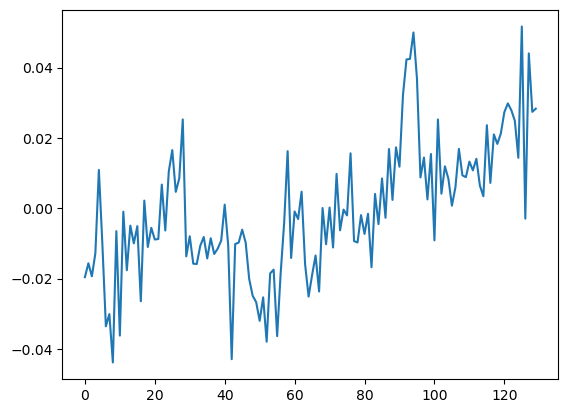

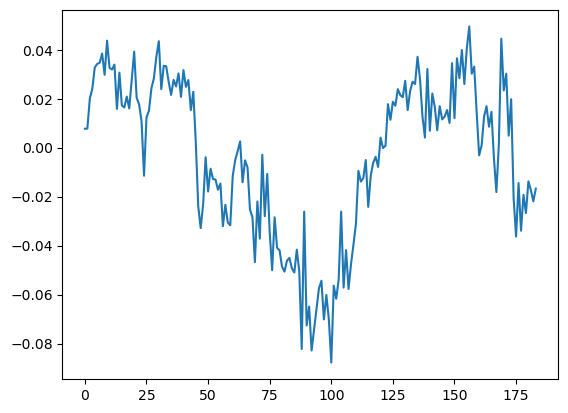

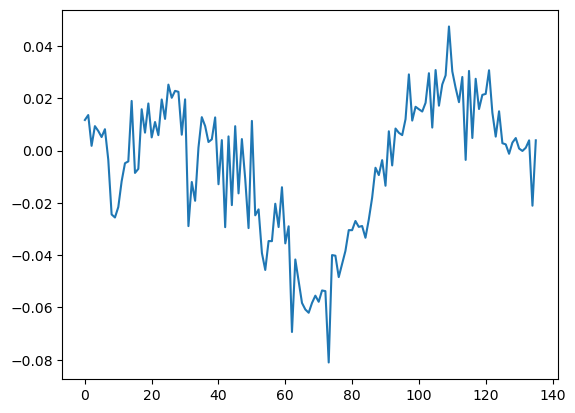

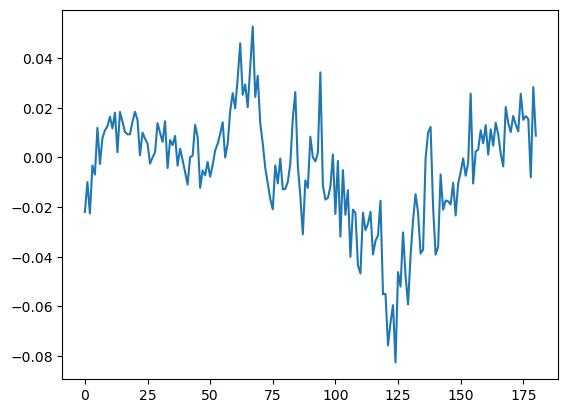

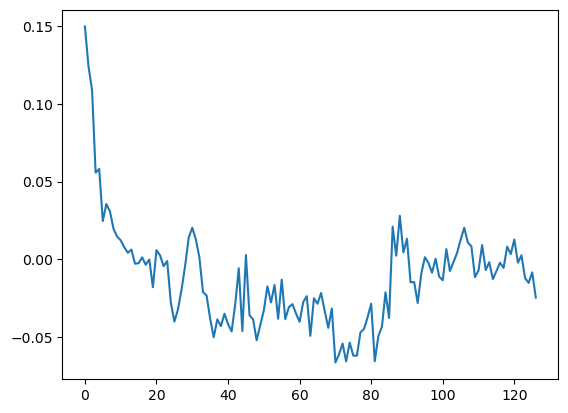

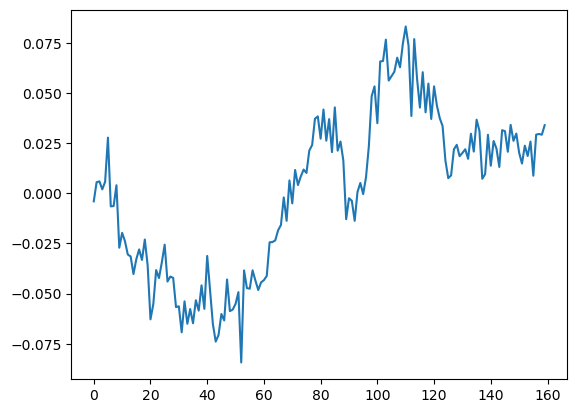

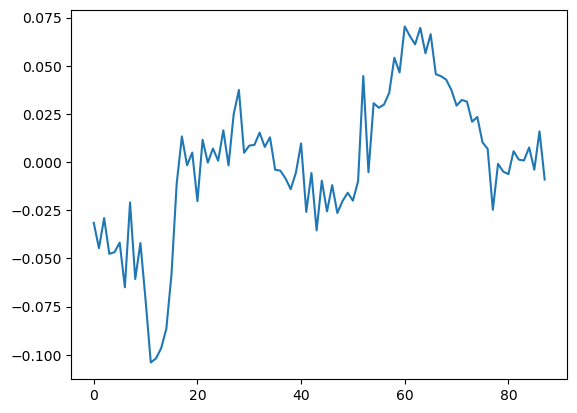

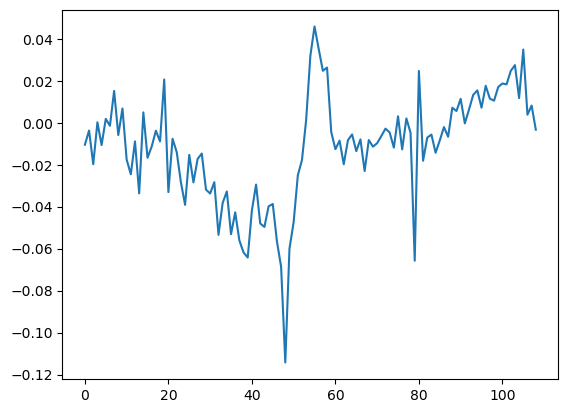

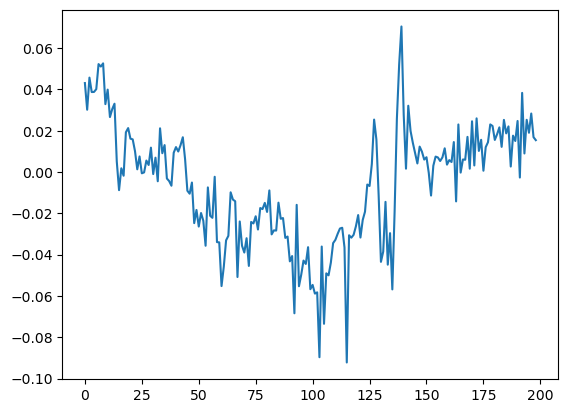

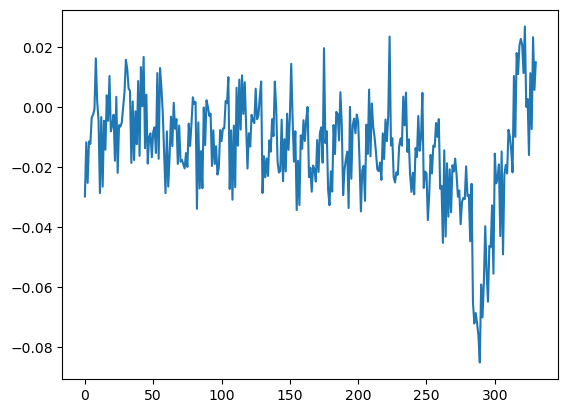

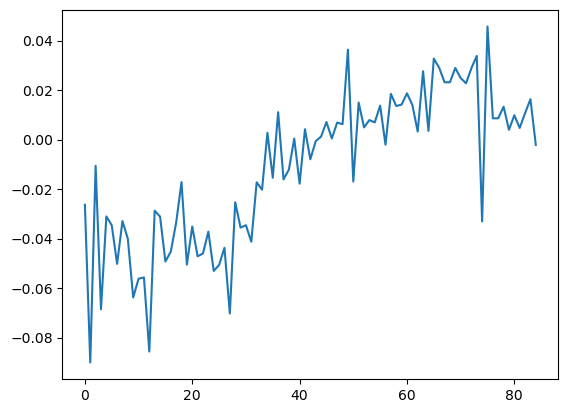

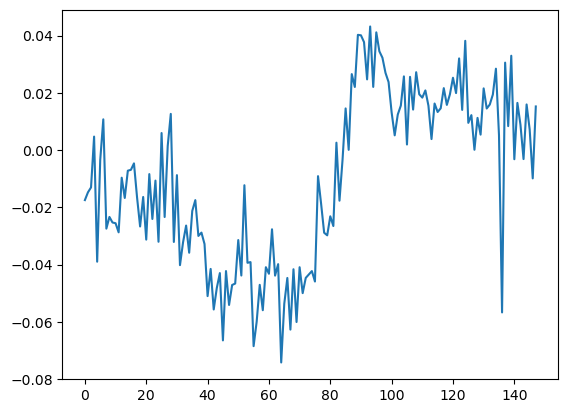

IndexError: index 67 is out of bounds for axis 0 with size 67

In [33]:
# plot the first storm of the y_train to be sure it is the right variable

import matplotlib.pyplot as plt
for i in range(0,96):
    plt.plot(X_train[i,:,18])
    plt.show()